In [1]:
from os import listdir
for d in listdir('.'):
    if 'Google' in d:
        os.rename(d, d.split('_')[0].strip())

In [2]:
import numpy
embeddings = numpy.load('./embeddings.npy')
image_list = numpy.load('./image_list.npy')
cleaned_imagelist = list(map(lambda x: x.split('/')[-2]+'/' + x.split('/')[-1], image_list))

In [3]:
name2embedding = {}
name2file = {}
for idx, ent in enumerate(cleaned_imagelist):
    name = ent.split('/')[0]
    filename = ent.split('/')[1]
    if name in name2embedding:
        name2embedding[name].append(embeddings[idx])
    else:
        name2embedding[name] = [embeddings[idx]]
    if name in name2file:
        name2file[name].append(filename)
    else:
        name2file[name] = [filename]

(array([ 0, 12, 14, 24, 30, 32, 32, 32, 32, 32, 32, 34]), array([32, 32, 32, 32, 32,  0, 12, 14, 24, 30, 34, 32]))


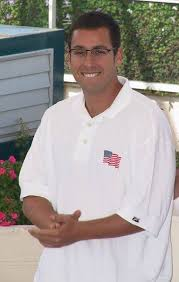

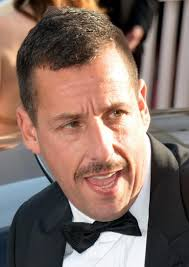

In [4]:
root = "celebs"
example = list(name2embedding.keys())[0]
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import numpy as np
dists = squareform(pdist(name2embedding[example],'cosine'))
outliers = np.where(dists > 1.2)
print(outliers)
from os import path
idx = -3
folder = example
path_1 =  path.join(root,folder, name2file[folder][outliers[0][idx]])
path_2 =  path.join(root,folder, name2file[folder][outliers[1][idx]])
from IPython.core.display import Image as DImage
display(DImage(filename=path_1))
display(DImage(filename=path_2))

In [5]:
from scipy.spatial import KDTree
tree = KDTree(embeddings)

In [23]:
tree.query(embeddings[100],2)[1]

array([100, 110])

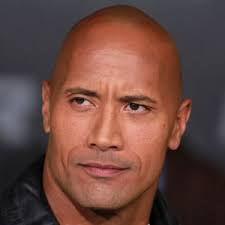

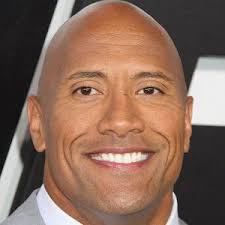

In [52]:
images = tree.query(embeddings[307],2)[1]
root = "celebs"
example = list(name2embedding.keys())[0]
from os import path
older = example
path_1 =  path.join(root,folder, image_list[images[0]])
path_2 =  path.join(root,folder, image_list[images[1]])
from IPython.core.display import Image as DImage
display(DImage(filename=path_1))
display(DImage(filename=path_2))

In [79]:
query_embeddings = numpy.load('./query_embeddings.npy')

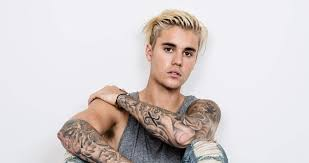

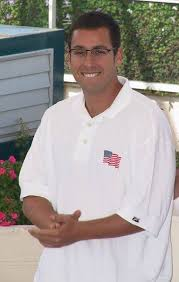

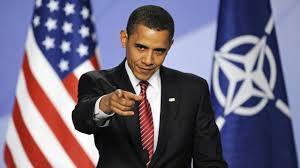

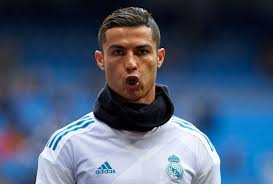

In [100]:
from os import path
from IPython.core.display import Image as DImage

images = tree.query(query_embeddings[0],4)[1]
root = "celebs"
for img in images:
    display(DImage(filename=image_list[img]))